In [1]:
import pm4py
log_all = pm4py.read_xes('BPI_Challenge_2019.xes')

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 251734/251734 [02:48<00:00, 1489.98it/s]


In [2]:
last_timestamp = max(event["time:timestamp"] for trace in log_all for event in trace)
print("Last Timestamp:", last_timestamp)
first_timestamp = min(event["time:timestamp"] for trace in log_all for event in trace)
print("First Timestamp:", first_timestamp)

time_filtered_log = pm4py.filter_time_range(log_all, "2018-09-01 00:00:00", "2018-12-01 00:00:00", mode='traces_contained')

Last Timestamp: 2020-04-09 21:59:00+00:00
First Timestamp: 1948-01-26 22:59:00+00:00


In [3]:
print(f'activities: {list(pm4py.get_event_attribute_values(time_filtered_log,"concept:name").keys())}')
print("Number of different trace variants: ", len(pm4py.get_variants_as_tuples(time_filtered_log)))

activities: ['Create Purchase Order Item', 'Delete Purchase Order Item', 'Vendor creates invoice', 'Record Goods Receipt', 'Record Invoice Receipt', 'Clear Invoice', 'Remove Payment Block', 'Cancel Goods Receipt', 'Change Quantity', 'Vendor creates debit memo', 'Cancel Invoice Receipt', 'Change Price', 'Receive Order Confirmation', 'Change Storage Location', 'Change Delivery Indicator', 'Block Purchase Order Item', 'Create Purchase Requisition Item', 'Reactivate Purchase Order Item', 'Record Service Entry Sheet', 'SRM: Created', 'SRM: Complete', 'SRM: Awaiting Approval', 'SRM: Document Completed', 'SRM: Ordered', 'SRM: In Transfer to Execution Syst.', 'SRM: Change was Transmitted', 'SRM: Deleted', 'SRM: Transaction Completed', 'Cancel Subsequent Invoice', 'Change Approval for Purchase Order', 'Release Purchase Order', 'Update Order Confirmation', 'Record Subsequent Invoice', 'Change payment term', 'Change Final Invoice Indicator', 'Set Payment Block']
Number of different trace variants

In [4]:
from exdpn.petri_net import get_petri_net
log = pm4py.filter_event_attribute_values(
    time_filtered_log,
    "concept:name",
    ['Create Purchase Order Item', 'Vendor creates invoice', 'Record Goods Receipt', 'Record Invoice Receipt', 
    'Clear Invoice', 'Record Service Entry Sheet', 'Cancel Goods Receipt', 
    'Vendor creates debit memo', 'Cancel Invoice Receipt', 'Change Delivery Indicator', 'Remove Payment Block', 
    'Change Price', 'Delete Purchase Order Item', 'Change Quantity', 
    'Change Final Invoice Indicator', 'Receive Order Confirmation', 'Cancel Subsequent Invoice', 
    'Reactivate Purchase Order Item', 'Update Order Confirmation', 'Block Purchase Order Item', 
    'Change Approval for Purchase Order', 'Release Purchase Order', 'Record Subsequent Invoice', 'Set Payment Block', 
    'Create Purchase Requisition Item', 'Change Storage Location', 'Change Currency', 'Change payment term', 
    'Change Rejection Indicator', 'Release Purchase Requisition'],
    level="event",
    retain=True)

print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(log)))



Number of different trace variants - subtraces:  1535


In [5]:
log_start = pm4py.get_start_activities(log)
print(log_start)
filtered_log = pm4py.filter_start_activities(log, 'Create Purchase Order Item')
print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(filtered_log)))

end_activities = pm4py.get_end_activities(log)
print(end_activities)
filtered_log = pm4py.filter_end_activities(log, ["Clear Invoice"])

print("Number of different trace variants - subtraces: ", len(pm4py.get_variants_as_tuples(filtered_log)))

{'Create Purchase Order Item': 11176, 'Vendor creates invoice': 347, 'Vendor creates debit memo': 3, 'Create Purchase Requisition Item': 14665, 'Release Purchase Order': 1, 'Change Approval for Purchase Order': 13}
Number of different trace variants - subtraces:  959
{'Delete Purchase Order Item': 1850, 'Clear Invoice': 10521, 'Create Purchase Order Item': 1521, 'Cancel Goods Receipt': 175, 'Record Goods Receipt': 4576, 'Record Invoice Receipt': 5316, 'Receive Order Confirmation': 123, 'Change Delivery Indicator': 104, 'Block Purchase Order Item': 17, 'Record Service Entry Sheet': 401, 'Change Approval for Purchase Order': 211, 'Change Quantity': 107, 'Change Storage Location': 15, 'Change Price': 48, 'Remove Payment Block': 1187, 'Release Purchase Order': 1, 'Change payment term': 1, 'Cancel Subsequent Invoice': 4, 'Cancel Invoice Receipt': 1, 'Record Subsequent Invoice': 1, 'Vendor creates invoice': 23, 'Update Order Confirmation': 1, 'Set Payment Block': 1}
Number of different trace

In [6]:
# We discard less frequent variants in order to reduce
# the number of edge cases.
log = pm4py.filter_variants_top_k(filtered_log, 10)

pm4py.write_xes(log, "BPI_Challenge_2019_filtered_top_k.xes")
len(log)

exporting log, completed traces :: 100%|██████████| 8345/8345 [00:04<00:00, 1753.96it/s]


8345

### Analysis

In [7]:
import pm4py
log = pm4py.read_xes("BPI_Challenge_2019_filtered_top_k.xes")

parsing log, completed traces :: 100%|██████████| 8345/8345 [00:08<00:00, 961.90it/s] 


In [8]:
from exdpn.petri_net import get_petri_net
net, im, fm = get_petri_net(log, miner_type='IM')

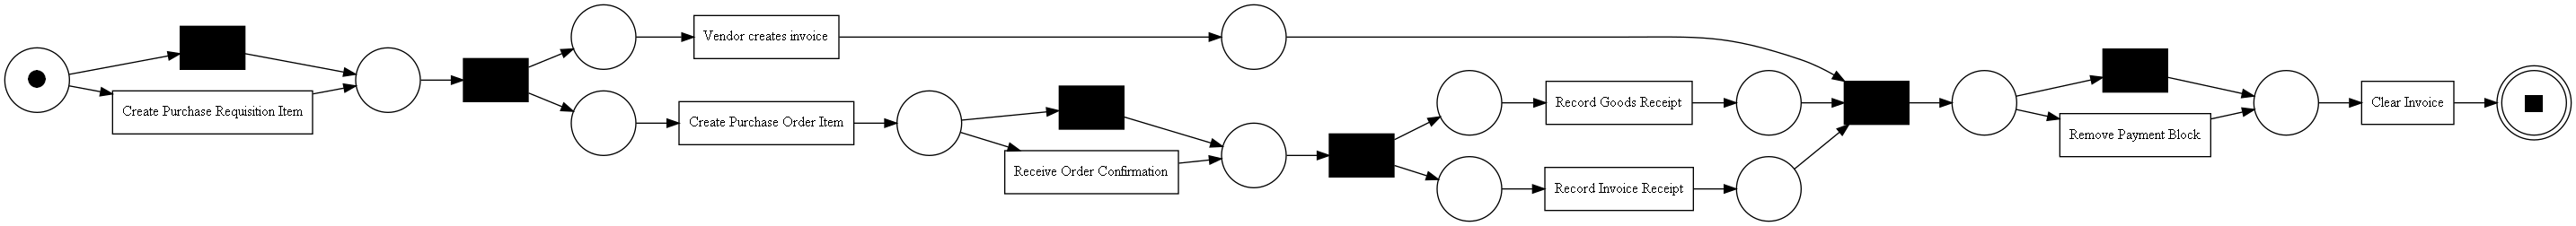

In [9]:
pm4py.view_petri_net(net, im, fm)

In [10]:
event_attrs = list(pm4py.get_event_attributes(log))
trace_attrs = list(pm4py.get_trace_attributes(log))

In [11]:
event_attrs = [attr for attr in event_attrs if max(list(pm4py.get_event_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
event_attrs.remove("time:timestamp")
event_attrs.remove("org:resource")
event_attrs.remove("User")
event_attrs

['Cumulative net worth (EUR)', 'concept:name']

In [12]:
trace_attrs = [attr for attr in trace_attrs if max(list(pm4py.get_trace_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
trace_attrs.remove("Name")
trace_attrs.remove("Item")
trace_attrs.remove("Purchasing Document")
trace_attrs

['Goods Receipt',
 'GR-Based Inv. Verif.',
 'Purch. Doc. Category name',
 'Item Type',
 'Vendor',
 'Item Category',
 'Document Type',
 'Spend classification text',
 'Source',
 'Spend area text',
 'Sub spend area text',
 'Company']

### Without hyperparameter:

In [15]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.RF, ML_Technique.SVM, ML_Technique.NN]#, ML_Technique.XGB]
dpn = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     ml_list=ml_list, 
                     verbose=True, 
                     impute=True,
                     hyperparameters={ML_Technique.NN: {},
                                      ML_Technique.DT: {},
                                      ML_Technique.LR: {},
                                      ML_Technique.SVM: {},
                                      ML_Technique.RF: {}#,
                                      #ML_Technique.XGB: {}
                                      })

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_9'... Done
-> Evaluating guards at decision point 'source'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done
-> Evaluating guards at decision point 'p_4'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done


In [17]:
import re

# model xgb separatly due to special characters in the data sets
xgb_gm = {}
from exdpn.guards import Guard_Manager
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
for dp in list(dpn.decision_points):
    dp_dataset = dpn.guard_ds_per_place[dp]
    dp_gm = Guard_Manager(dp_dataset,
                          ml_list=[ML_Technique.XGB],
                          hyperparameters={ML_Technique.XGB: {}},
                          impute=True)
    for col in dp_gm.df_X:
        dp_gm.df_X[col] = [regex.sub("_", value) if any(x in str(value) for x in set(('[', ']', '<'))) else value for value in dp_gm.df_X[col]]

    dp_gm.train_test()
    xgb_gm[dp] = dp_gm.f1_mean_test[ML_Technique.XGB]

In [18]:
import pandas as pd

res = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn.guard_manager_per_place.items():
    res_row = {"place":dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res = res.append([res_row])

res['place'] = res['place'].apply(str)
res.index = res["place"]
res.drop(["place"], axis=1, inplace=True)
res.dropna(axis=1, how="all", inplace=True)

# xgb results
res_xgb = pd.DataFrame(columns=["place"] + [str(ML_Technique.XGB)])
for dp, result in xgb_gm.items():
    res_xgb = res_xgb.append([{"place":dp} | {str(ML_Technique.XGB):result}])

res_xgb['place'] = res_xgb['place'].apply(str)
res_xgb.index = res_xgb["place"]
res_xgb.drop(["place"], axis=1, inplace=True)
res_xgb.dropna(axis=1, how="all", inplace=True)

In [19]:
res_complete = pd.concat([res, res_xgb], axis = 1)
res_complete.transpose()

place,p_9,source,p_4
Decision Tree,0.994998,0.865294,0.800930
Logistic Regression,0.997817,0.840570,0.838051
Random Forest,0.998767,0.867371,0.807579
Support Vector Machine,0.997955,0.868458,0.829063
Neural Network,0.997498,0.859772,0.825057
XGBoost,0.994620,0.814831,0.822698


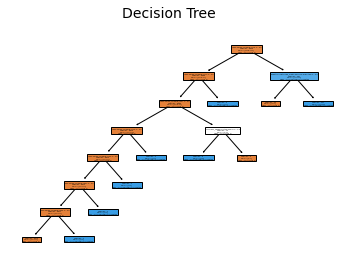

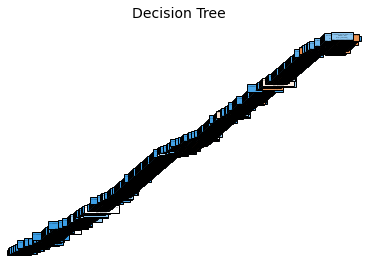

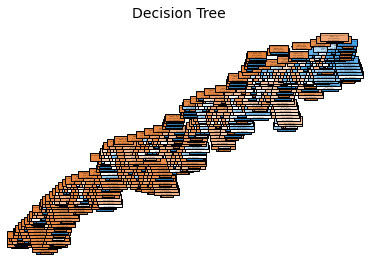

In [20]:
dps = list(dpn.decision_points)
for p in dps:
    dt_guard = dpn.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

### Hyperparameter Selection

In [21]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
from exdpn.petri_net import get_petri_net
from exdpn.guard_datasets import extract_all_datasets
from exdpn.data_preprocessing import basic_data_preprocessing
from exdpn.data_preprocessing.data_preprocessing import apply_ohe, apply_scaling, fit_scaling, fit_ohe
from exdpn.guards import ML_Technique

# prepare data
dp_dataset_map = extract_all_datasets(log= log, net=net, initial_marking=im, final_marking=fm, 
                                      event_level_attributes = event_attrs,
                                      case_level_attributes=trace_attrs)

# decision points 
dps = list(dp_dataset_map.keys())

#### Cross-Validation Decision Tree (with respect to explainablility)

We have observed that decision trees tend to be enormously large without any hyperparameters. We thus try to find an optimal `min_impurity_decrease` value.

In [25]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_impurity_decrease':(0, 0.01, 0.05, 0.1, 0.15)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    dt_base = DecisionTreeClassifier()
    dt_grid = GridSearchCV(dt_base, parameters, n_jobs=-1, scoring='f1_weighted')

    dt_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(dt_grid.best_score_,4)}\t {dt_grid.best_params_}")
    best_values[dp] = dt_grid.best_params_['min_impurity_decrease']

min_impurity_decrease = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {min_impurity_decrease}")

p_9:	0.9952	 {'min_impurity_decrease': 0.01}
source:	0.8649	 {'min_impurity_decrease': 0}
p_4:	0.8753	 {'min_impurity_decrease': 0.01}
final value: 0.006666666666666667


#### Cross-Validaion Neural Network

In [23]:
from sklearn.neural_network import MLPClassifier
parameters = {'hidden_layer_sizes': ((5, ), (5, 5), (10, 10), (5, 10, 5))}

best_values = {}
max_ds_size = -1
max_ds_key = None

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    if len(dp_dataset) > max_ds_size: max_ds_key = dp
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    nn_base = MLPClassifier()
    nn_grid = GridSearchCV(nn_base, parameters, n_jobs=-1, scoring='f1_weighted')

    nn_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(nn_grid.best_score_,4)}\t {nn_grid.best_params_}")
    best_values[dp] = nn_grid.best_params_['hidden_layer_sizes']

hidden_layer_sizes = best_values[max_ds_key]
print(f"final value: {hidden_layer_sizes}")

p_9:	0.9982	 {'hidden_layer_sizes': (5, 10, 5)}
source:	0.8673	 {'hidden_layer_sizes': (5, 10, 5)}
p_4:	0.8275	 {'hidden_layer_sizes': (5, 10, 5)}
final value: (5, 10, 5)


#### Cross-Validation Logistic Regression:

In [26]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': (0.1, 0.25)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    lr_base = LogisticRegression()
    lr_grid = GridSearchCV(lr_base, parameters, n_jobs=-1, scoring='f1_weighted')

    lr_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(lr_grid.best_score_,4)}\t {lr_grid.best_params_}")
    best_values[dp] = lr_grid.best_params_['C']

C_lr = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_lr}")

p_9:	0.998	 {'C': 0.1}


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


source:	0.8112	 {'C': 0.25}
p_4:	0.8525	 {'C': 0.1}
final value: 0.15


#### Cross-Validation SVM:

In [27]:
from sklearn.svm import LinearSVC
parameters = {'C':(0.1, 0.25)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    svm_base = LinearSVC()
    svm_grid = GridSearchCV(svm_base, parameters, n_jobs=-1, scoring='f1_weighted')

    svm_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(svm_grid.best_score_,4)}\t {svm_grid.best_params_}")
    best_values[dp] = svm_grid.best_params_['C']

C_svm = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_svm}")

p_9:	0.9983	 {'C': 0.25}
source:	0.8659	 {'C': 0.25}
p_4:	0.8364	 {'C': 0.1}
final value: 0.2


#### Cross-Validation XGBoost:

In [28]:
import re
from xgboost import XGBClassifier

parameters = {'max_depth': (1, 3, 5, 10)}

# data sets contain special characters which xgb boost cannot handel
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

best_values = {}
for dp in dps: 
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    # remove special characters
    # solution from: https://stackoverflow.com/questions/48645846/pythons-xgoost-valueerrorfeature-names-may-not-contain-or
    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    xgb_base = XGBClassifier()
    xgb_grid = GridSearchCV(xgb_base, parameters, n_jobs=-1, scoring='f1_weighted')

    xgb_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(xgb_grid.best_score_,4)}\t {xgb_grid.best_params_}")
    best_values[dp] = xgb_grid.best_params_['max_depth']

max_depth_xgb = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {max_depth_xgb}")

p_9:	0.9955	 {'max_depth': 1}
source:	0.8175	 {'max_depth': 10}
p_4:	0.8479	 {'max_depth': 1}
final value: 4


#### Cross-Validation Random Forest:

In [30]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': (10, 20, 50)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute=True)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    rf_base = RandomForestClassifier()
    rf_grid = GridSearchCV(rf_base, parameters, n_jobs=-1, scoring='f1_weighted')

    rf_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(rf_grid.best_score_,4)}\t {rf_grid.best_params_}")
    best_values[dp] = rf_grid.best_params_['n_estimators']

n_estimators = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {n_estimators}")

p_9:	0.9988	 {'n_estimators': 10}
source:	0.8668	 {'n_estimators': 50}
p_4:	0.8101	 {'n_estimators': 10}
final value: 23


### With hyperparameter:

In [31]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.NN, ML_Technique.SVM, ML_Technique.RF]#, ML_Technique.XGB]

dpn_hp = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     ml_list=ml_list, 
                     verbose=True, 
                     impute=True,
                     hyperparameters = {ML_Technique.NN: {'hidden_layer_sizes': hidden_layer_sizes}, 
                                        ML_Technique.DT: {'min_impurity_decrease': min_impurity_decrease},
                                        ML_Technique.LR: {"C": C_lr},
                                        ML_Technique.SVM: {"C": C_svm},
                                        #ML_Technique.XGB: {"max_depth": max_depth_xgb},
                                        ML_Technique.RF: {'n_estimators': n_estimators,
                                                         'min_impurity_decrease': min_impurity_decrease}})

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_9'... Done
-> Evaluating guards at decision point 'source'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done
-> Evaluating guards at decision point 'p_4'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done


In [33]:
import re

# model xgb separatly due to special characters in the daa sets
xgb_hp_gm = {}
from exdpn.guards import Guard_Manager
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
for dp in list(dpn.decision_points):
    dp_dataset = dpn.guard_ds_per_place[dp]
    dp_gm_hp = Guard_Manager(dp_dataset,
                          ml_list=[ML_Technique.XGB],
                          hyperparameters={ML_Technique.XGB: {"max_depth": max_depth_xgb}},
                          impute=True)
    for col in dp_gm_hp.df_X:
        dp_gm_hp.df_X[col] = [regex.sub("_", value) if any(x in str(value) for x in set(('[', ']', '<'))) else value for value in dp_gm_hp.df_X[col]]

    dp_gm_hp.train_test()
    xgb_hp_gm[dp] = dp_gm_hp.f1_mean_test[ML_Technique.XGB]

In [34]:
import pandas as pd

res_hp = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn.guard_manager_per_place.items():
    res_row = {"place":dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res_hp = res_hp.append([res_row])

res_hp['place'] = res_hp['place'].apply(str)
res_hp.index = res_hp["place"]
res_hp.drop(["place"], axis=1, inplace=True)
res_hp.dropna(axis=1, how="all", inplace=True)

# xgb results
res_hp_xgb = pd.DataFrame(columns=["place"] + [str(ML_Technique.XGB)])
for dp, result in xgb_hp_gm.items():
    res_hp_xgb = res_hp_xgb.append([{"place":dp} | {str(ML_Technique.XGB):result}])

res_hp_xgb['place'] = res_hp_xgb['place'].apply(str)
res_hp_xgb.index = res_hp_xgb["place"]
res_hp_xgb.drop(["place"], axis=1, inplace=True)
res_hp_xgb.dropna(axis=1, how="all", inplace=True)

res_hp_complete = pd.concat([res, res_xgb], axis = 1)
res_hp_complete.transpose()

place,p_9,source,p_4
Decision Tree,0.994998,0.865294,0.800930
Logistic Regression,0.997817,0.840570,0.838051
Random Forest,0.998767,0.867371,0.807579
Support Vector Machine,0.997955,0.868458,0.829063
Neural Network,0.997498,0.859772,0.825057
XGBoost,0.994620,0.814831,0.822698


In [35]:
res_hp = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn_hp.guard_manager_per_place.items():
    res_row = {"place": dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res_hp = res_hp.append([res_row])
    
res_hp['place'] = res_hp['place'].apply(str)
res_hp.index = res_hp["place"]
res_hp.drop(["place"], axis=1, inplace=True)
res_hp.dropna(axis=1, how="all", inplace=True)

res_hp.transpose()

place,p_9,source,p_4
Decision Tree,0.995218,0.691832,0.874570
Logistic Regression,0.997931,0.764789,0.846048
Neural Network,0.997596,0.861794,0.827568
Support Vector Machine,0.997703,0.836075,0.833114
Random Forest,0.957070,0.577490,0.709989


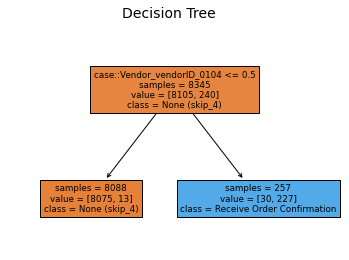

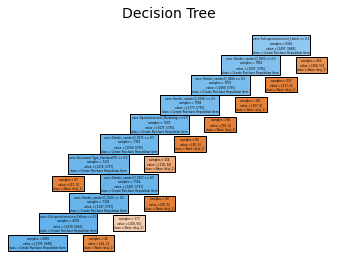

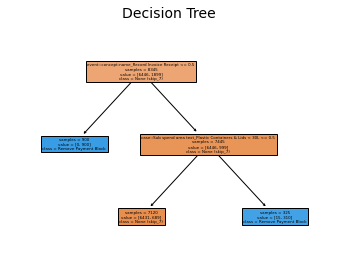

In [36]:
dps_hp = list(dpn_hp.decision_points)
for p in dps_hp:
    dt_guard = dpn_hp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

#### Summary:

In [37]:
res_complete.transpose()

place,p_9,source,p_4
Decision Tree,0.994998,0.865294,0.800930
Logistic Regression,0.997817,0.840570,0.838051
Random Forest,0.998767,0.867371,0.807579
Support Vector Machine,0.997955,0.868458,0.829063
Neural Network,0.997498,0.859772,0.825057
XGBoost,0.994620,0.814831,0.822698


In [38]:
res_hp_complete.transpose()

place,p_9,source,p_4
Decision Tree,0.994998,0.865294,0.800930
Logistic Regression,0.997817,0.840570,0.838051
Random Forest,0.998767,0.867371,0.807579
Support Vector Machine,0.997955,0.868458,0.829063
Neural Network,0.997498,0.859772,0.825057
XGBoost,0.994620,0.814831,0.822698
